In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 8)

In [4]:
def load_df(s):
    from sgmarb.backtesting.data import clean_dataframe
    from stratagemdataprocessing.bookmakers.common.odds.cache import HistoricalOddsCache

    hoc = HistoricalOddsCache(parse=False)
    sdf = clean_dataframe(hoc.get('%s.BF' % s), min_matched=0)
    if sdf is not None:
        sdf['timestamp'] = pd.to_datetime(sdf.timestamp, unit='ms')
        return sdf.set_index('timestamp')
    else:
        return None

In [6]:
df12 = load_df('BB-EENP2352840-FT12-1')
dfps = load_df('BB-EENP2352840-FTTP-U-197_5')

/home/tspooner/.venv/st/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/home/tspooner/.venv/st/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=10,adjust=True,com=30).mean()
  after removing the cwd from sys.path.


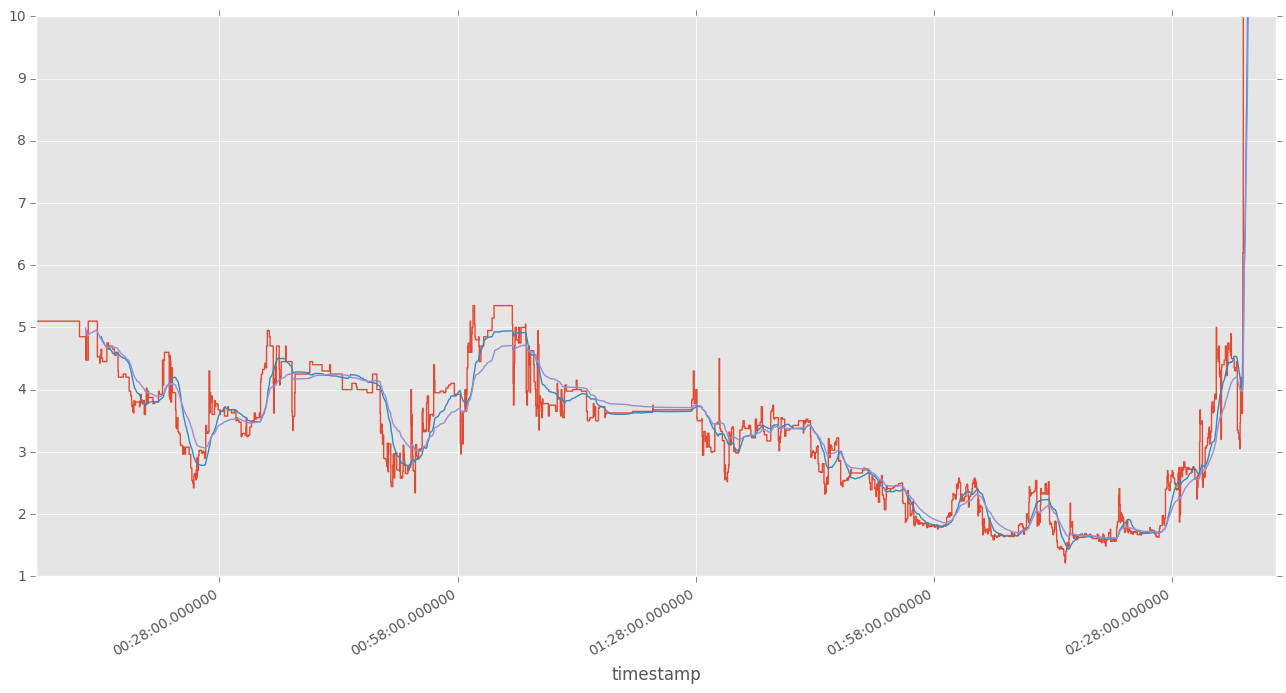

In [10]:
mp = (df12.lp1 + df12.bp1)/2
mp.plot(drawstyle='steps-post')
pd.rolling_mean(mp, 30).plot()
pd.ewma(mp, 30, min_periods=10).plot()

_ = plt.ylim([1.0, 10.0])

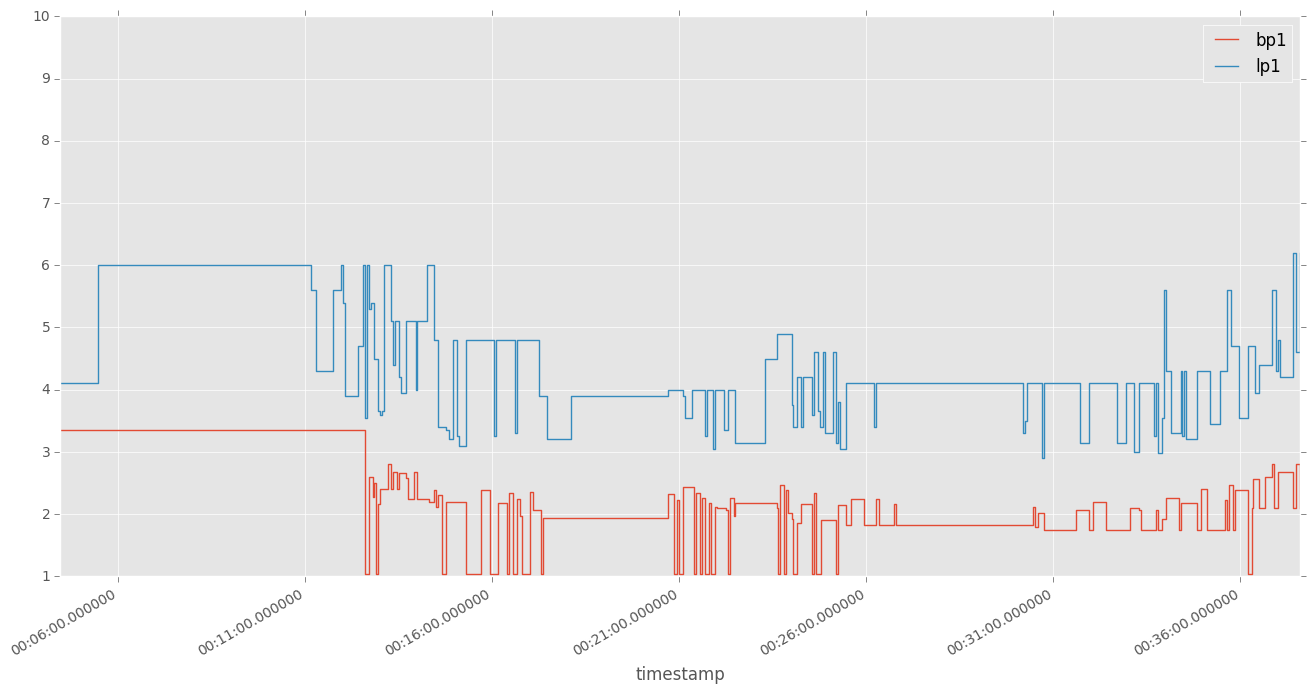

In [21]:
dfps.iloc[0:200][['bp1', 'lp1']].plot(drawstyle='steps-post')
_ = plt.ylim([1.0, 10.0])

/home/tspooner/.venv/st/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  
/home/tspooner/.venv/st/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=10,adjust=True,com=30).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


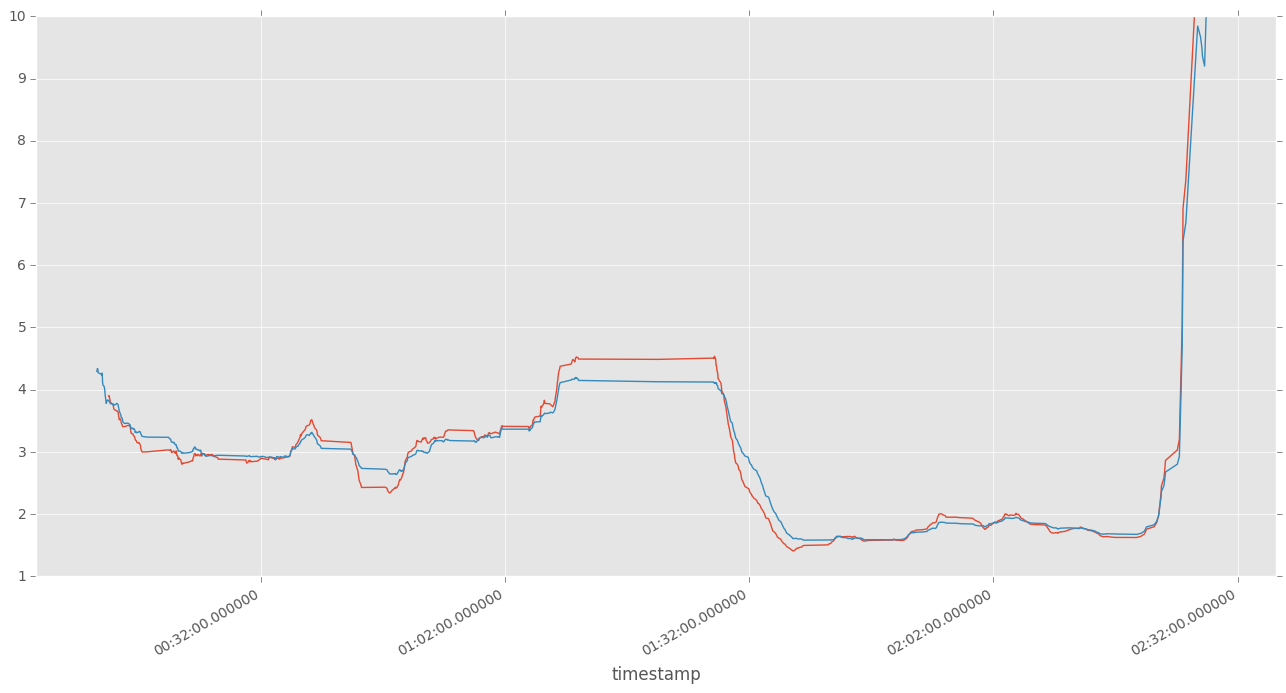

In [12]:
mp = (dfps.lp1 + dfps.bp1)/2
pd.rolling_mean(mp, 30).plot()
pd.ewma(mp, 30, min_periods=10).plot()

_ = plt.ylim([1.0, 10.0])

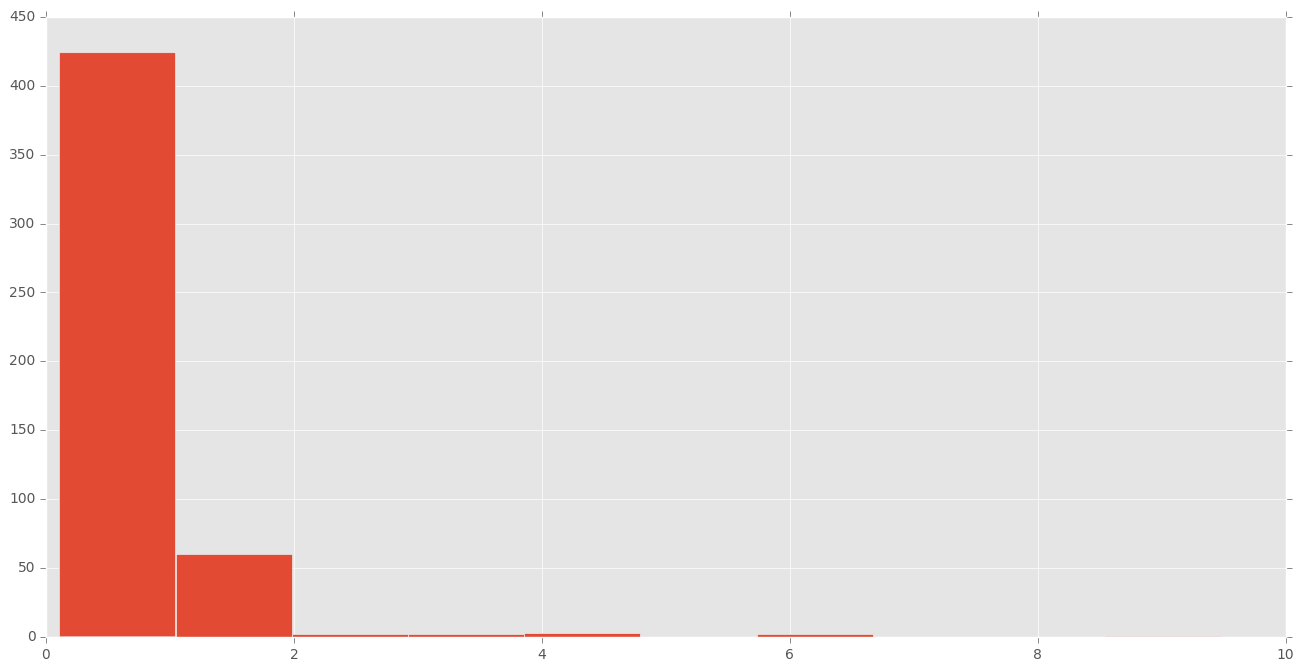

In [29]:
(dfps.lp1 - dfps.bp1).hist()